In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import joblib

In [66]:
distributions={}

In [41]:
drugbank = pd.read_csv('data/intermediate/interactions_preprocessed.csv')

In [3]:
drugbank

,drug_id,gene_id,drug_fingerprint_code,target_gene_code,Y,target_gene_encoded,drug_fingerprint_encoded,target_gene_encoded_len,drug_fingerprint_encoded_len,mismatch,target_gene_encoded_mismatch,drug_fingerprint_encoded_mismatch,target_gene_encoded_padded,drug_fingerprint_encoded_padded
0,DB02704,BE0004010,2968968094 1824088295 2976033787 1228528465 29...,ATGCATTTAAATCCAGCAGAGAAAGAAAAATTACAAATTTTTCTAG...,0,[0 3 2 1 0 3 3 3 0 0 0 3 1 1 0 2 1 0 2 0 2 0 0...,"[2, 9, 6, 8, 9, 6, 8, 0, 9, 4, 1, 8, 2, 4, 0, ...",303,916,-613,20919,8585,"['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1...","['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1..."
1,DB06684,BE0001790,2968968094 2803848648 2968968094 2803848648 20...,ATGGAAATTAATGTGAGTAAATTAAGAACAGATTTGCCTCAAGTCG...,0,[0 3 2 2 0 0 0 3 3 0 0 3 2 3 2 0 2 3 0 0 0 3 3...,"[2, 9, 6, 8, 9, 6, 8, 0, 9, 4, 2, 8, 0, 3, 8, ...",957,644,313,20265,8857,"['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1...","['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1..."
2,DB03811,BE0001167,3218693969 3777168895 3217380708 3585958780 21...,ATGCCAAACTACAAACTCACTTATTTTAATATGAGGGGGAGAGCAG...,0,[0 3 2 1 1 0 0 0 1 3 0 1 0 0 0 1 3 1 0 1 3 3 0...,"[3, 2, 1, 8, 6, 9, 3, 9, 6, 9, 3, 7, 7, 7, 1, ...",600,195,405,20622,9306,"['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1...","['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1..."
3,DB02095,BE0004952,3218693969 98513984 3218693969 98513984 321869...,ATGATCATCTTAATTTACTTATTTCTCTTGCTATGGGAAGACACTC...,0,[0 3 2 0 3 1 0 3 1 3 3 0 0 3 3 3 0 1 3 3 0 3 3...,"[3, 2, 1, 8, 6, 9, 3, 9, 6, 9, 9, 8, 5, 1, 3, ...",834,207,627,20388,9294,"['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1...","['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1..."
4,DB03698,BE0002359,2246728737 3542456614 2245384272 1173125914 22...,ATGATGATGATGATGATGATGAAAAAAATGCAGCATCAACGGCAGC...,0,[0 3 2 ... 3 0 2],"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 4, 2, 4, ...",6546,1216,5330,14676,8285,"['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1...","['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84427,DB08280,BE0000329,2246728737 3537123720 2245277810 2442433719 22...,ATGGCTTTTATGAAAAAATATCTCCTCCCCATTCTGGGGCTCTTCA...,1,[0 3 2 2 1 3 3 3 3 0 3 2 0 0 0 0 0 0 3 0 3 1 3...,"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 3, 7, 1, ...",879,544,335,20343,8957,"['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1...","['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1..."
84428,DB04113,BE0000465,2968968094 2142032900 2968968094 2142032900 29...,ATGAGCACAGCAGGAAAAGTAATCAAATGCAAAGCAGCTGTGCTAT...,1,[0 3 2 ... 3 2 0],"[2, 9, 6, 8, 9, 6, 8, 0, 9, 4, 2, 1, 4, 2, 0, ...",1128,158,970,20094,9343,"['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1...","['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1..."
84429,DB08198,BE0001852,2246728737 422715066 3217380708 4247217172 321...,ATGGCGTCGCAGCCAAATTCGTCTGCGAAGAAGAAAGAGGAGAAGG...,1,[0 3 2 ... 3 0 0],"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 4, 2, 2, 7, 1, ...",3171,460,2711,18051,9041,"['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1...","['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1..."
84430,DB09076,BE0000560,2968968094 2119439498 2968968094 1653789098 21...,ATGAATAACTCAACAAACTCCTCTAACAATAGCCTGGCTCTTACAA...,1,[0 3 2 ... 3 0 0],"[2, 9, 6, 8, 9, 6, 8, 0, 9, 4, 2, 1, 1, 9, 4, ...",1401,612,789,19821,8889,"['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1...","['-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1..."


In [67]:
morgan_finderprint_length_list = []
gene_length_list = []

for index, row in drugbank.iterrows():
    morgan_finderprint_length_list.append(len(row['drug_fingerprint_code']))
    gene_length_list.append(len(row['target_gene_code']))

In [68]:
distributions['GL_DrugBank']=gene_length_list
distributions['CL_DrugBank']=morgan_finderprint_length_list

Text(0,0.5,'Count')

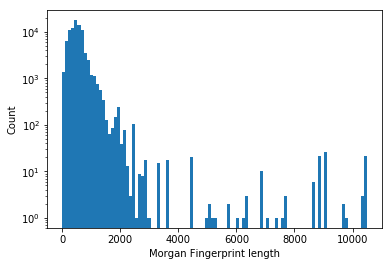

In [45]:
plt.hist(morgan_finderprint_length_list, bins = 100, log = True)
plt.xlabel('Morgan Fingerprint length')
plt.ylabel('Count')

Text(0,0.5,'PDF')

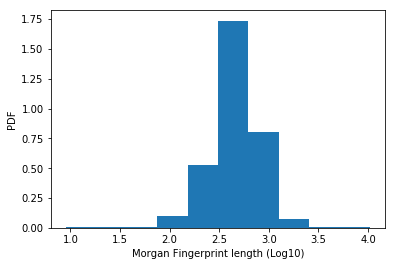

In [52]:
plt.hist(np.log10(morgan_finderprint_length_list),density=True)
plt.xlabel('Morgan Fingerprint length (Log10)')
plt.ylabel('PDF')

Text(0,0.5,'Count')

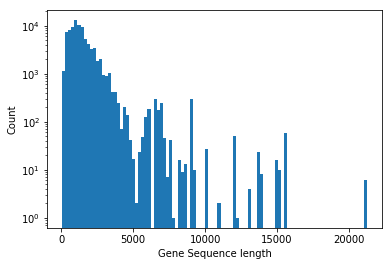

In [6]:
plt.hist(gene_length_list, bins = 100, log = True)
plt.xlabel('Gene Sequence length')
plt.ylabel('Count')

Text(0,0.5,'PDF')

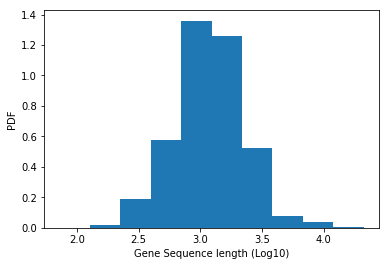

In [53]:
plt.hist(np.log10(gene_length_list),density=True)
plt.xlabel('Gene Sequence length (Log10)')
plt.ylabel('PDF')

In [8]:
pos_samples = drugbank.loc[drugbank['Y'] == 1]
neg_samples = drugbank.loc[drugbank['Y'] == 0]

In [9]:
len(pos_samples), len(neg_samples)

(14074, 70358)

In [10]:
len(set(pos_samples['drug_id'].tolist())),len(set(pos_samples['gene_id'].tolist()))

(6215, 3774)

In [11]:
len(set(neg_samples['drug_id'].tolist())),len(set(neg_samples['gene_id'].tolist()))

(4866, 2869)

# Human Genes

In [54]:
human_genes = pd.read_pickle('data/corona_gene_aa_seq.pkl')

In [55]:
human_genes

,hgnc_symbol,gene_sequence,amino_acid_sequence
0,AP3B1,ACTGCGCATGCGCAGGGGGTGGACTGCCAGGTCGGCTCAGGGAGCC...,TAHAQGVDCQVGSGSRDESGSACARSSVRELVLFRALWTGTFWREP...
1,BRD4,GACGTCAGTGCGCTGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCTG...,DVSALAAAAAAAAAAGLFVLVSRSRGAEAVAAAAAAAAAGGARGRA...
2,BRD2,GGCCAAATCGTCTTCAGAGTCCTCCAGTGAGGAAAGTAGCAGTGAG...,GQIVFRVLQ*GK*Q*ELL*GRGGGR*GRGGRRE*KLRLRGRKGSSL...
3,CWC27,AGCGGTGCTCGGGTCCGGTAACAACATGGCGGCGTCCGTGAGGGGC...,SGARVR*QHGGVREGLLWAGVVFGVPVLRDIDKLKLSCTTGLKEEC...
4,ZC3H18,AGGACTACCGTCGCGGCCTGATGACGTCGCACAATGGCCGGCCCCC...,RTTVAA**RRTMAGPRG*WSPFVPPVSSLEPEPVKSGRAKGRLLHA...
...,...,...,...
325,BCS1L,AAGGAGGACGCTGAGCCGTCAAGATTAAGAACCTTCACCTGCGGGA...,KEDAEPSRLRTFTCGRAG*GRRQVGTREEIRLSSGQEG*GRERTD*...
326,NDUFAF1,GGAAGGGAAAAGCAGATGGACCTATACGGGTAAAGTGGCTTCTGGG...,GREKQMDLYG*SGFWAEGTL*ARGGKRRQAGGWCVPGVGRRQSPGT...
327,TMED5,GTCAGGGGGAGAGGCGGGCGGCGCTCACGCCTGGCCTGAGGGGGCC...,VRGRGGRRSRLA*GGRD*GGCGIGLLAPPRVPTLWRTALLFRRECS...
328,NDUFB9,GCCCTTCCGGCTGGCCCCGCTCAGTCACCCGCAGCAGGCGTGCAGT...,ALPAGPAQSPAAGVQFPGSPRGRGRSAP*WRSWRRDPT*PISKRCC...


In [69]:
human_gene_length_list = []

for index, row in human_genes.iterrows():
    human_gene_length_list.append(len(row['gene_sequence']))

Text(0,0.5,'Count')

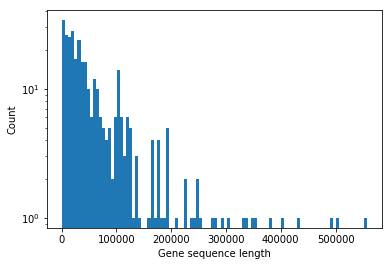

In [70]:
plt.hist(human_gene_length_list, bins = 100, log = True)
plt.xlabel('Gene sequence length')
plt.ylabel('Count')

In [71]:
distributions['GL_HTcovid']=human_gene_length_list

# Viral Proteins

In [58]:
viral_genes = pd.read_pickle('data/viral_proteins_NYT.pkl')

In [23]:
viral_genes

,function,protein_code,gene_sequence,amino_acid_sequence
0,Cellular Saboteur,NSP1,AUGGAGAGCCUUGUCCCUGGUUUCAACGAGAAAACACACGUCCAAC...,MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHL...
1,Mystery Protein,NSP2,GCAUACACUCGCUAUGUCGAUAACAACUUCUGUGGCCCUGAUGGCU...,AYTRYVDNNFCGPDGYPLECIKDLLARAGKASCTLSEQLDFIDTKR...
2,Untagging and Cutting,NSP3,GCACCAACAAAGGUUACUUUUGGUGAUGACACUGUGAUAGAAGUGC...,APTKVTFGDDTVIEVQGYKSVNITFELDERIDKVLNEKCSAYTVEL...
3,Bubble Maker,NSP4,AAAAUUGUUAAUAAUUGGUUGAAGCAGUUAAUUAAAGUUACACUUG...,KIVNNWLKQLIKVTLVFLFVAAIFYLITPVHVMSKHTDFSSEIIGY...
4,Protein Scissors,NSP5,AGUGGUUUUAGAAAAAUGGCAUUCCCAUCUGGUAAAGUUGAGGGUU...,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS...
5,Bubble Factory,NSP6,AGUGCAGUGAAAAGAACAAUCAAGGGUACACACCACUGGUUGUUAC...,SAVKRTIKGTHHWLLLTILTSLLVLVQSTQWSLFFFLYENAFLPFA...
6,Copy Assistants,NSP7,UCUAAAAUGUCAGAUGUAAAGUGCACAUCAGUAGUCUUACUCUCAG...,SKMSDVKCTSVVLLSVLQQLRVESSSKLWAQCVQLHNDILLAKDTT...
7,Copy Assistants,NSP8,GCUAUAGCCUCAGAGUUUAGUUCCCUUCCAUCAUAUGCAGCUUUUG...,AIASEFSSLPSYAAFATAQEAYEQAVANGDSEVVLKKLKKSLNVAK...
8,At the Heart of the Cell,NSP9,AAUAAUGAGCUUAGUCCUGUUGCACUACGACAGAUGUCUUGUGCUG...,NNELSPVALRQMSCAAGTTQTACTDDNALAYYNTTKGGRFVLALLS...
9,Genetic Camouflage,NSP10,GCUGGUAAUGCAACAGAAGUGCCUGCCAAUUCAACUGUAUUAUCUU...,AGNATEVPANSTVLSFCAFAVDAAKAYKDYLASGGQPITNCVKMLC...


In [72]:
viral_gene_length_list = []

for index, row in viral_genes.iterrows():
    viral_gene_length_list.append(len(row['gene_sequence']))

Text(0,0.5,'Count')

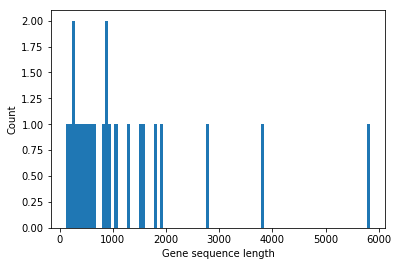

In [73]:
plt.hist(viral_gene_length_list, bins = 100) #, log = True)
plt.xlabel('Gene sequence length')
plt.ylabel('Count')

In [74]:
distributions['GL_VPcovid']=viral_gene_length_list

# DTC Stats

In [28]:
dtc_d = pd.read_csv('data/DTC_data.csv')

/miniconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,1,2,3,8,14,21,22,23,24,25,26,27,30,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
len(dtc_d)

5980952

In [30]:
len(set(dtc_d['compound_id'].tolist()))

1140345

In [31]:
len(set(dtc_d['gene_names'].tolist()))

3166

In [32]:
len(set(dtc_d['target_id'].tolist()))

7145

# NDM Length Distributions

In [61]:
ndm_df = pd.read_pickle('data/NDM_Master_FingerPrints_InChi.pkl')

In [36]:
ndm_df

,name,InChIKey,First Block,Metabolon_RP,UCD_GC,UCD_HIL,UCD_LIP,UCD_PFP,phenolexplorer_id,dfc_id,...,hbondacc,rotbonds,dois,InChiKey,cid,fingerprint_r2,fingerprint,fingerprint_vector,fingerprint_r2_vector,glove_vector
0,"1,5,8-Trihydroxy-3-methyl-2-prenylxanthone",AAANZTDKTFGJLZ-UHFFFAOYSA-N,AAANZTDKTFGJLZ,NaN,NaN,NaN,NaN,NaN,NaN,HHG46-P:HHG14-E,...,6.0,3.0,10.1007/978-94-007-1764-0_15,AAANZTDKTFGJLZ-UHFFFAOYSA-N,14162674.0,2246728737 3545365497 2246699815 176403689 224...,2246728737 3545365497 2246699815 176403689 224...,1.2125952 -0.45228845 -0.45648438 0.8465898 -2...,0.08833204 0.111414164 -0.37103447 0.13921869 ...,0.5982757 0.33405483 -0.7447651 -1.0637729 1.4...
1,"2,4-Dimethylfuran",AABTWRKUKUPMJG-UHFFFAOYSA-N,AABTWRKUKUPMJG,NaN,NaN,NaN,NaN,NaN,NaN,FWS22-S:FWS22-S,...,1.0,0.0,10.1007/978-3-642-41473-2_4|10.1007/978-94-007...,AABTWRKUKUPMJG-UHFFFAOYSA-N,19462.0,2246728737 422715066 3217380708 3661262542 321...,2246728737 422715066 3217380708 3661262542 321...,0.7780322 -0.008117993 -0.31886604 -0.08983363...,0.05996513 0.058616612 -0.16668518 0.08901948 ...,0.7881843 -0.11993383 -1.035832 -1.1379453 1.3...
2,Schidigerasaponin E1,AADIIQJBIMAADJ-UHFFFAOYSA-N,AADIIQJBIMAADJ,NaN,NaN,NaN,NaN,NaN,NaN,GMN25-P:JYJ15-F,...,18.0,8.0,NaN,AADIIQJBIMAADJ-UHFFFAOYSA-N,73798945.0,2246728737 1858577693 2976033787 1228815484 29...,2246728737 1858577693 2976033787 1228815484 29...,-0.13111542 -2.1445282 -1.7001715 -0.793216 -1...,-0.010426988 0.058215413 -0.17470427 0.3262831...,0.45775712 1.4772747 -0.8142888 0.24698713 0.6...
3,sphingomyelin (d18:1/20:0),AADLTHQNYQJHQV-SVLGDMRNSA-N,AADLTHQNYQJHQV,100006290.0,NaN,NaN,L489,NaN,NaN,NaN,...,6.0,40.0,10.1038/s41598-018-28477-9,AADLTHQNYQJHQV-SVLGDMRNSA-N,44260124.0,2246728737 3542456614 2245384272 1173125914 22...,2246728737 3542456614 2245384272 1173125914 22...,1.1118712 -3.3872707 0.19861576 2.4934237 -0.0...,0.17508355 -0.19388516 -0.33345646 0.13449408 ...,0.47446114 0.31419408 0.03206512 -1.0402479 0....
4,Matairesinoside,AAGCATAPYOEULE-LHHMAMHXSA-N,AAGCATAPYOEULE,NaN,NaN,NaN,NaN,NaN,NaN,JRV93-M:JJJ08-E,...,11.0,9.0,10.1016/j.bmcl.2013.08.065|10.1016/j.fitote.20...,AAGCATAPYOEULE-LHHMAMHXSA-N,486612.0,2246728737 3975275337 864674487 2076190208 321...,2246728737 3975275337 864674487 2076190208 321...,0.46425006 -0.7574755 -1.289255 0.8256081 -2.9...,0.080369376 0.053641893 -0.3176836 0.17028345 ...,0.47634116 0.8720007 -0.7416479 -0.7085184 1.2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19598,"2,5-Dimethyl-3-(methyldithio)furan",ZZXDUGZYDILQMO-UHFFFAOYSA-N,ZZXDUGZYDILQMO,NaN,NaN,NaN,NaN,NaN,NaN,MFW29-D:MFW29-D,...,3.0,2.0,10.1007/978-3-319-26932-0_10,ZZXDUGZYDILQMO-UHFFFAOYSA-N,20313888.0,2246728737 422715066 3217380708 3661262542 321...,2246728737 422715066 3217380708 3661262542 321...,0.5096015 0.4900139 0.24447432 0.18041344 -0.1...,0.095634416 -0.06425911 -0.18737948 0.10294013...,0.25041574 -0.15444656 -0.8587896 -0.99885875 ...
19599,Muricadienin,ZZXWNKPYSIVFNM-XUWLZAGCSA-N,ZZXWNKPYSIVFNM,NaN,NaN,NaN,NaN,NaN,NaN,FFY87-E:FOW95-G,...,2.0,27.0,10.1021/acs.jnatprod.6b00335|10.1021/ol502849y...,ZZXWNKPYSIVFNM-XUWLZAGCSA-N,131751334.0,2246728737 3542456614 2245384272 1173125914 22...,2246728737 3542456614 2245384272 1173125914 22...,0.8148282 -3.9692025 0.7532225 1.7267354 -0.45...,0.2708331 -0.13801025 -0.25443316 0.20883478 0...,0.68793035 0.38539666 -0.032631543 -1.2271056 ...
19600,L-Lysopine,ZZYYVZYAZCMNPG-UHFFFAOYSA-N,ZZYYVZYAZCMNPG,NaN,NaN,NaN,NaN,NaN,NaN,HGR03-W:GZD90-U,...,6.0,8.0,NaN,ZZYYVZYAZCMNPG-UHFFFAOYSA-N,3325403.0,2246728737 3537119515 2245273601 2637439965 22...,2246728737 3537119515 2245273601 2637439965 22...,0.12395296 -2.207925 -2.0375855 2.5450706 0.54...,-0.020846456 -0.06992156 -0.4119097 0.1573976 ...,0.5720562 -0.076057404 0.37635037 -0.77714705 ...
19601,Sarcodon scabrosus Depsipeptide,ZZZCVVSDKFDQJU-UHFFFAOYSA-N,ZZZCVVSDKFDQJU,NaN,NaN,NaN,NaN,NaN,NaN,NRT85-T:NRT85-T,...,8.0,5.0,NaN,ZZZCVVSDKFDQJU-UHFFFAOYSA-N,1

In [75]:
morgan_finderprint_length_list = []

for index, row in ndm_df.iterrows():
    morgan_finderprint_length_list.append(len(row['fingerprint_r2']))

Text(0,0.5,'Count')

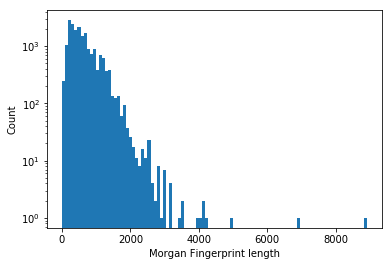

In [63]:
plt.hist(morgan_finderprint_length_list, bins = 100, log = True)
plt.xlabel('Morgan Fingerprint length')
plt.ylabel('Count')

Text(0,0.5,'PDF')

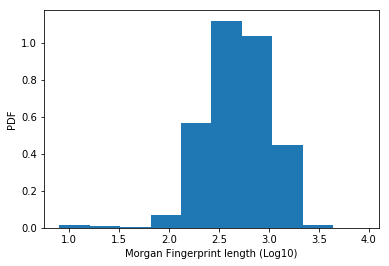

In [64]:
plt.hist(np.log10(morgan_finderprint_length_list),density=True)
plt.xlabel('Morgan Fingerprint length (Log10)')
plt.ylabel('PDF')

In [76]:
distributions['CL_NDM']=morgan_finderprint_length_list

In [77]:
pwd()

'/home/covid-target-finder'

In [80]:
distributions.keys()

dict_keys(['GL_DrugBank', 'CL_DrugBank', 'GL_HTcovid', 'GL_VPcovid', 'CL_NDM'])

In [81]:
joblib.dump(distributions, 'distributions_length.pkl')

['distributions_length.pkl']